In [1]:
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv'

df= pd.read_csv(url, index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
df. replace('?', np.nan, inplace= True)
num_cols_to_fix=['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
cat_cols_to_fix=['num-of-doors']

ni= SimpleImputer()
ci= SimpleImputer(strategy='most_frequent')
df[num_cols_to_fix]=ni.fit_transform(df[num_cols_to_fix])
df[cat_cols_to_fix]= ci.fit_transform(df[cat_cols_to_fix])
df.dropna(inplace=True)
df.price=df.price.astype(int)
df.shape

(201, 26)

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


In [6]:
num_cols=df.select_dtypes(include=['int64','float64', 'int32']).columns.tolist()
cat_cols= df.select_dtypes(include=['object']).columns.tolist()


In [7]:
import seaborn as sns

In [8]:
# sns.pairplot(df[num_cols], diag_kind='kde')

In [9]:
import matplotlib.pyplot as plt

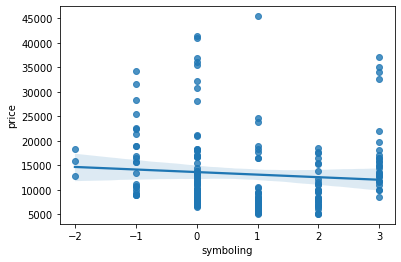

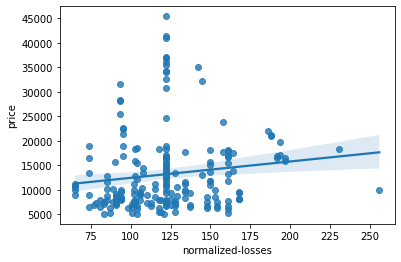

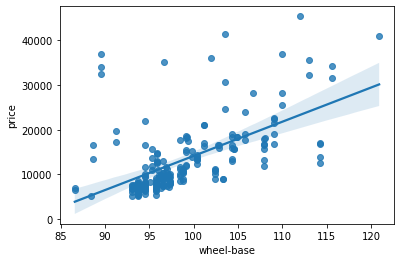

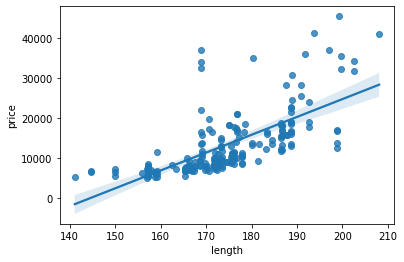

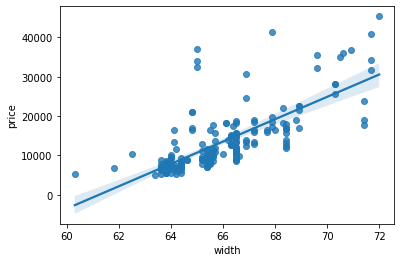

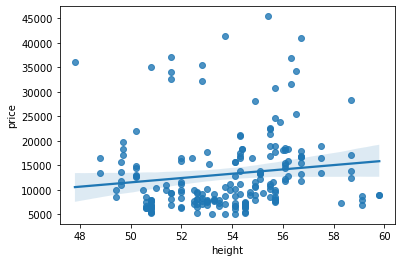

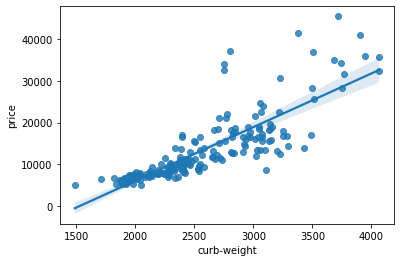

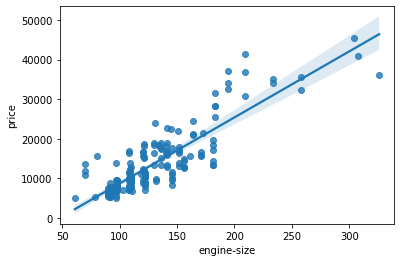

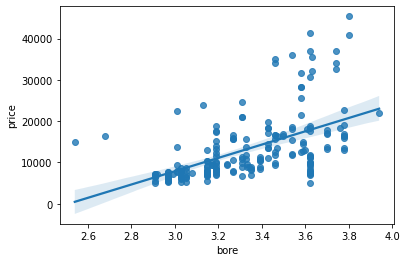

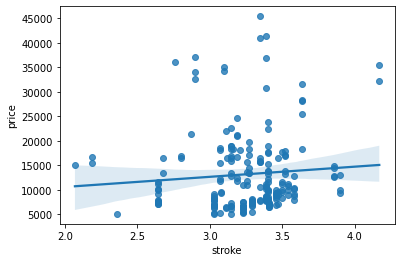

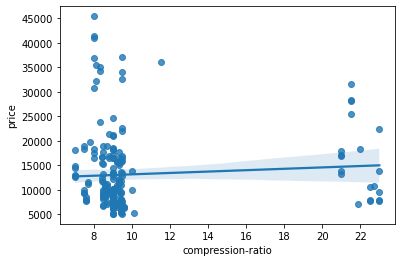

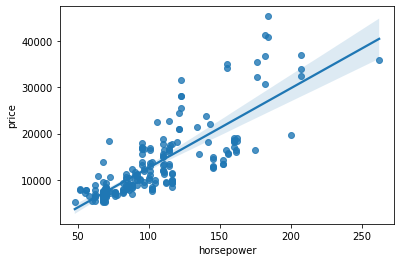

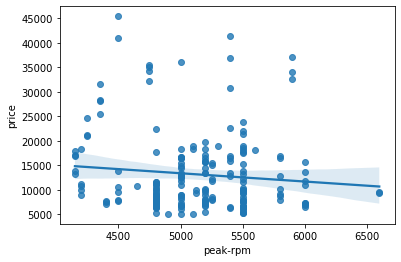

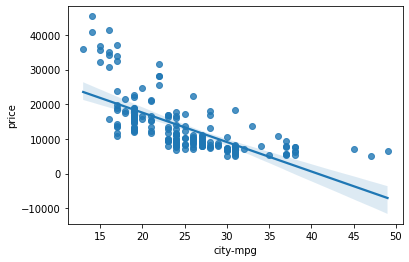

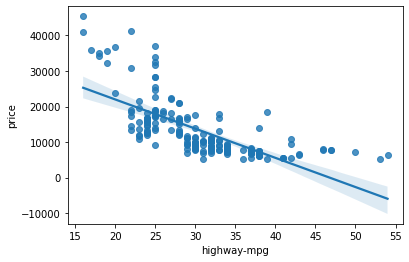

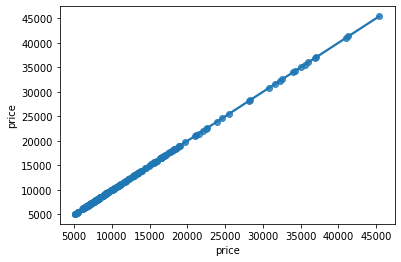

In [10]:
for col in num_cols:
    sns.regplot(x=col, y= 'price', data =df)
    plt.show()

In [11]:
num_cols_to_use={
    'horsepower',
    'wheel-base',
    'length',
    'width',
    'curb-weight',
    'engine-size',
    'bore',
    'city-mpg',
    'highway-mpg'

}

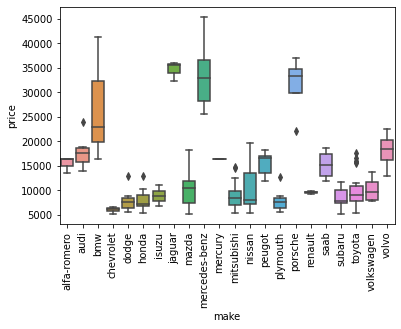

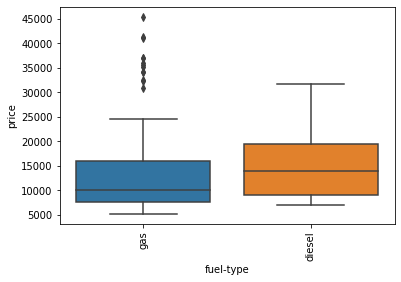

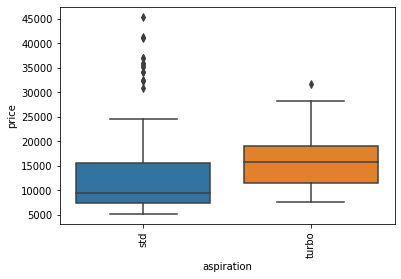

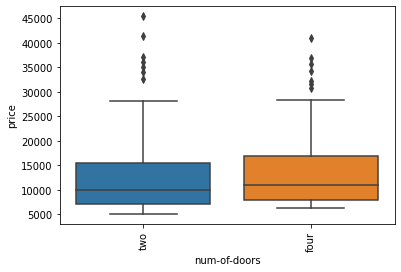

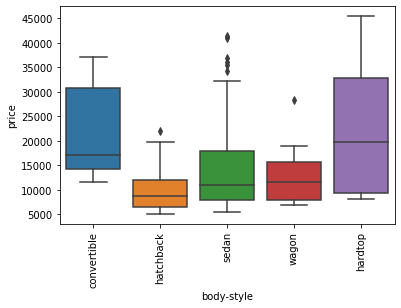

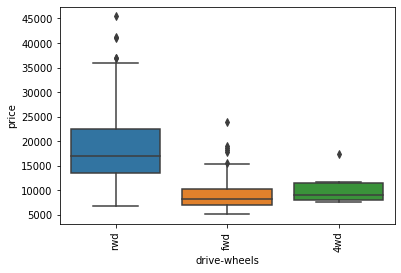

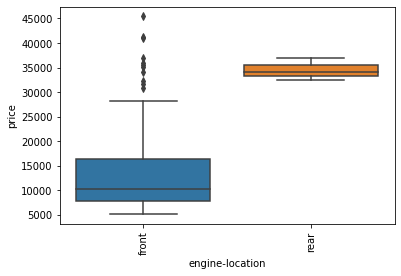

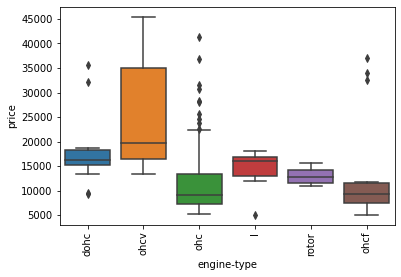

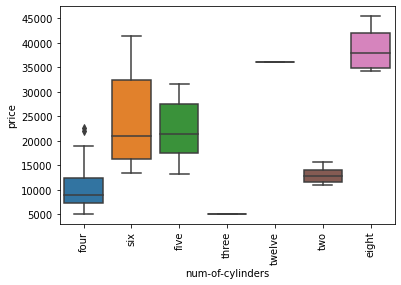

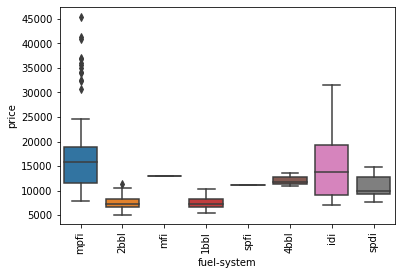

In [12]:
for col in cat_cols:
    sns.boxplot(x=col, y='price', data=df)
    plt.xticks(rotation=90)
    plt.show()

# Feature Selection using Algorithms of SkLearn

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

In [14]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df= pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
x= df.drop('Outcome', axis=1)
y=df['Outcome']


In [16]:
featSelect= SelectKBest(score_func=chi2, k=5)
featSelect.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000002039202E040>)

In [17]:
print("Scores for each Features:")
for col, score in zip(x.columns.to_list(), featSelect.scores_):
    print(f'{col.ljust(25)}: {score}')

Scores for each Features:
Pregnancies              : 111.51969063588255
Glucose                  : 1411.887040644141
BloodPressure            : 17.605373215320718
SkinThickness            : 53.10803983632434
Insulin                  : 2175.5652729220137
BMI                      : 127.66934333103643
DiabetesPedigreeFunction : 5.39268154697144
Age                      : 181.30368904430023


In [18]:
selected_cols=featSelect.get_feature_names_out().tolist()
print(selected_cols)


['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']


In [19]:
x_selected_5= x[selected_cols]
x_selected_5


,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33
...,...,...,...,...,...
763,10,101,180,32.9,63
764,2,122,0,36.8,27
765,5,121,112,26.2,30
766,1,126,0,30.1,47


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from  sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
xtrain, xtest, ytrain,ytest= train_test_split(x_selected_5, y,test_size=0.2, random_state=42)
clf= DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred= clf.predict(xtest)
print('accuracy_score =', accuracy_score(ytest, ypred))
print ('confusion_matrix =', confusion_matrix(ytest, ypred) )
print ('classification report =', classification_report(ytest, ypred) )



accuracy_score = 0.6753246753246753
confusion_matrix = [[70 29]
 [21 34]]
classification report =               precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



In [22]:
from sklearn.feature_selection import RFE

In [23]:
clf= DecisionTreeClassifier()
rfe= RFE(clf,n_features_to_select=5)
rfe.fit(x,y)
selected_cols= rfe.get_feature_names_out(). tolist()

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel





In [25]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x, y)
clf.feature_importances_  


array([0.11010539, 0.23456391, 0.10080615, 0.08028693, 0.07792381,
       0.14124673, 0.11858603, 0.13648105])

In [26]:
for col, score in zip(x.columns.to_list(), clf.feature_importances_ ):
    print(f'{col.ljust(25)}: {score}')

Pregnancies              : 0.11010539340316146
Glucose                  : 0.23456390992711615
BloodPressure            : 0.10080615037971447
SkinThickness            : 0.08028693024188314
Insulin                  : 0.07792380786831421
BMI                      : 0.1412467272453177
DiabetesPedigreeFunction : 0.11858602950443334
Age                      : 0.13648105143005945


In [27]:
selected= x[['Glucose', 'Age', 'BMI']]
xtrain, xtest, ytrain,ytest= train_test_split(selected, y,test_size=0.2, random_state=42)
clf= DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred= clf.predict(xtest)
print('accuracy_score =', accuracy_score(ytest, ypred))
print ('confusion_matrix =', confusion_matrix(ytest, ypred) )
print ('classification report =', classification_report(ytest, ypred) )


accuracy_score = 0.6818181818181818
confusion_matrix = [[71 28]
 [21 34]]
classification report =               precision    recall  f1-score   support

           0       0.77      0.72      0.74        99
           1       0.55      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.69      0.68      0.69       154

